In [2]:
import numpy as np
import pandas as pd
from numpy.random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
def LoadIrisData(iris):
   
    data=pd.read_csv(iris)
    
    # read the features data from the csv file
    # read the features data from the csv file
    X=data.iloc[:,0:4]
    X=np.array(X)
    # read the labels data from the csv file
    Y=data.iloc[:,4]
    Y=np.array(Y)
    
    return X, Y

In [4]:
def SplitTrainTest(X,Y):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    return X_train, X_test, Y_train, Y_test

In [5]:
X,Y = LoadIrisData('iris.csv')
    
 # STEP 2: split the data into train/test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
Y_train = pd.DataFrame(Y_train)
X_test

array([[5.2, 3.4, 1.4, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [6.1, 3. , 4.6, 1.4],
       [6.3, 3.4, 5.6, 2.4],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.1, 3.4, 1.5, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [5.6, 2.5, 3.9, 1.1],
       [5.1, 3.5, 1.4, 0.3],
       [6.3, 2.3, 4.4, 1.3],
       [4.8, 3.4, 1.9, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [4.8, 3. , 1.4, 0.1],
       [5.6, 2.8, 4.9, 2. ],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.4, 2

In [6]:
labels=Y_train[0].unique()
labels

array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [7]:
def Distance(test,train):   
    dist=[]
    for x in train:
        dist.append(np.sqrt(np.sum(np.power((test-x),2))))
    return dist

In [8]:
def Majority(x,y,K):
    
    y = pd.DataFrame(y)
    # the labels of the K nearest neighbors
    labels=y[0].unique()
    probability=np.zeros(y.nunique())
    # counting the number occurences of each label amongst the K nearest neighbors
    for index in range(min(K,y.shape[0])):
        for i in range(len(probability)):
            if(y[0][x[index]]==labels[i]):
                # the most frequent label amongst the K nearest neighbors
                probability[i]=probability[i]+1
    #print(probability)
    index_to_sent=np.argmax(probability)
    
    return labels[index_to_sent]

In [9]:
def KNearestNeighborsClassifier(X_train, Y_train , X_test, K):
    
    Y_test = []
     
    # loop through the examples to be make classification
    for test in X_test:
        # compute the pairwise distances between the each unclassified example and 
        # all classified examples
        distances=[]
        distances=Distance(test,X_train)
        arg=np.argsort(distances);
        # labels of its K nearest neighbors
        Y_test.append(Majority(arg,Y_train,K))
 
    return Y_test

In [10]:
def PlotAccuracy(accuracy):
    plt.figure(figsize=(14,5))
    plt.plot(accuracy,'.-')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN estimated accuracy for various values of K');
    return

In [11]:
def Accuracy(Y_pred, Y_test):
    # calculate the accuracy - the ratio between the number of examples 
    counter=0
    range_indexes=len(Y_pred)
    for i in range(range_indexes):
        if(Y_pred[i]==Y_test[i]):
            counter=counter+1
    accuracy=counter/range_indexes
    

    return accuracy

In [12]:
def main(fname, Kmax):
    
    # STEP 1: load data
    X,Y = LoadIrisData(fname)
    
    # STEP 2: split the data into train/test datasets
    X_train, X_test, Y_train, Y_test = SplitTrainTest(X,Y)
    #print('Data is split into ' + str(X_train.shape[0]) + ' examples for training and ' + str(X_test.shape[0]) + ' examples for testing')
    Y_train=pd.DataFrame(Y_train)
    # an array to store all computed accuracies
    accuracy = np.zeros(Kmax)
    
    # repeat for all considered values of K
    for K in range(Kmax):
        # STEP 3: classify the test data using a KNN classifier
        Y_pred = KNearestNeighborsClassifier(X_train, Y_train, X_test , K+1)
        # STEP 4: calculate the KNN classifier accuracy
        accuracy[K] = Accuracy(Y_pred, Y_test)
        
    # plot results

    return accuracy

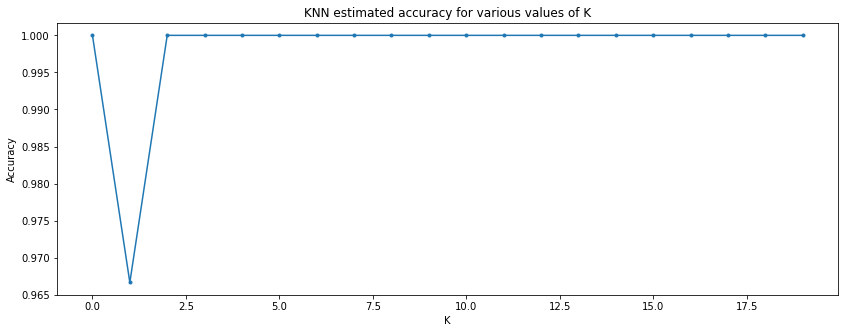

In [13]:
fname = "iris.csv"
Kmax = 20
accuracy=main(fname, Kmax)
PlotAccuracy(accuracy)

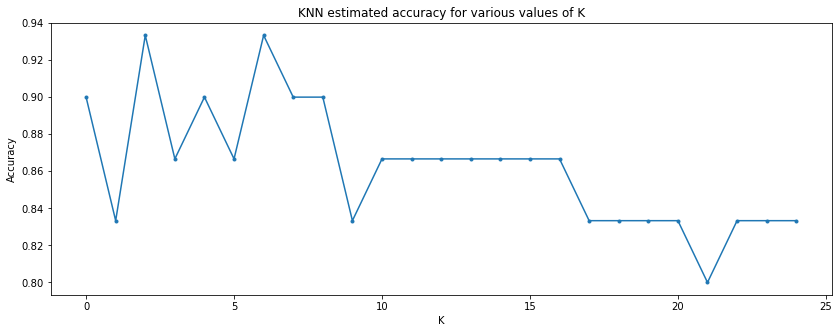

In [14]:
fname = "iris.csv"
Kmax = 25
accuracy=main(fname, Kmax)
PlotAccuracy(accuracy)

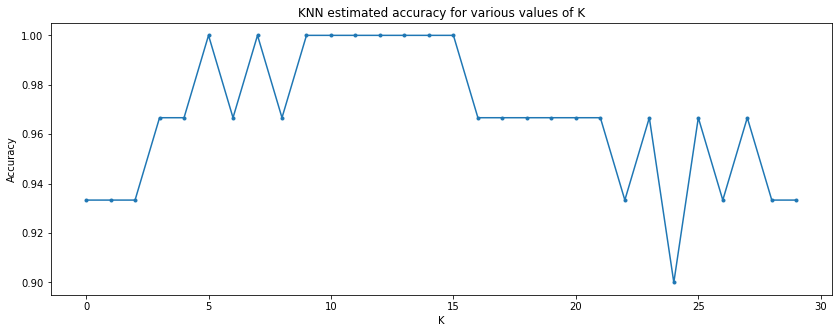

In [15]:
fname = "iris.csv"
Kmax = 30
accuracy=main(fname, Kmax)
PlotAccuracy(accuracy)

The best k is 15


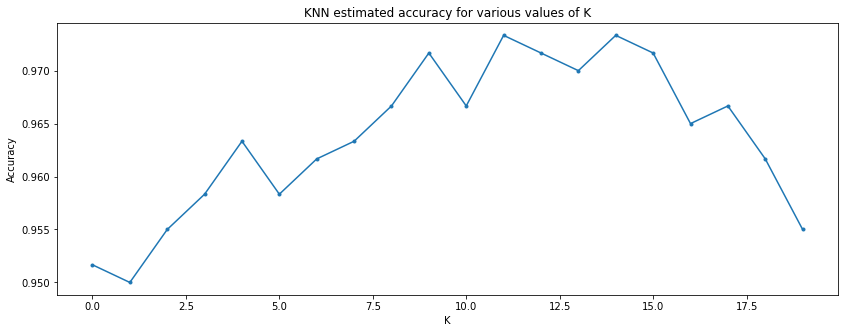

In [18]:
fname = 'iris.csv'
Kmax = 20
accuracy=np.ones((20,20))
accuracy_mean=np.zeros((1,20));
for iteration in range (0,20):
    accuracy[iteration]=main(fname, Kmax)
accuracy_mean=accuracy.mean(axis=0)
PlotAccuracy(accuracy_mean)
print("The best k is "+str(np.argmax(accuracy_mean)+1))


In [ ]:
fname = 'iris.csv'
Kmax = 100
accuracy=np.ones((100,100))
accuracy_mean=np.zeros((1,100));
for iteration in range (0,100):
    accuracy[iteration]=main(fname, Kmax)
accuracy_mean=accuracy.mean(axis=0)
PlotAccuracy(accuracy_mean)
print("The best k is "+str(np.argmax(accuracy_mean)+1))
